# Day 01 #

## 1 深度学习基础 ##
    五大训练方法
    四大数据类型

## 2 线性回归实现 ##

In [39]:
import torch
from IPython import display
from matplotlib import pyplot as plt
import numpy as np
import random

In [40]:
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
features = torch.randn(num_examples, num_inputs, dtype=torch.float32)
labels = true_w[0]*features[:,0]+true_w[1]*features[:, 1]+true_b
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()),dtype=torch.float32)                     

C:\Users\86189\AppData\Local\Temp\ipykernel_4216\3370982425.py:2: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


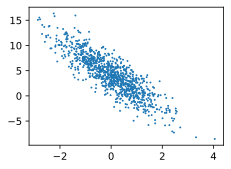

In [41]:
def use_svg_display():
    display.set_matplotlib_formats('svg')

def set_figsize(figsize=(3.5, 2.5)):
    use_svg_display()
    plt.rcParams['figure.figsize']=figsize

set_figsize()
plt.scatter(features[:, 1].numpy(), labels.numpy(),1);


In [42]:
def data_iter(batch_size, featues, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = torch.LongTensor(indices[i: min(i + batch_size, num_examples)])
        yield features.index_select(0, j), labels.index_select(0, j)

In [43]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, y)
    break

tensor([[ 1.8337, -0.9702],
        [-0.4789, -0.5769],
        [ 0.0167,  0.1906],
        [ 0.4446, -0.6944],
        [-1.3920,  1.0767],
        [-1.2188, -0.1973],
        [-0.0733,  0.0037],
        [-0.4213, -1.4019],
        [ 0.6345,  0.8072],
        [ 0.9878,  1.7039]]) tensor([11.1628,  5.2096,  3.5812,  7.4467, -2.2435,  2.4341,  4.0352,  8.1268,
         2.7255,  0.3805])


下面这个函数每次返回 `batch_size` 大小的数据

In [44]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = torch.LongTensor(indices[i: min(i + batch_size, num_examples)])
        yield features.index_select(0, j), labels.index_select(0, j)

In [45]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, y)
    break

tensor([[ 0.7786, -1.7325],
        [-0.0133, -0.1362],
        [-0.8350,  1.1074],
        [ 0.2507,  0.4292],
        [ 0.7823, -0.4626],
        [ 0.4737,  1.5065],
        [ 0.3337, -0.2426],
        [ 0.8793, -1.2770],
        [ 0.1347,  1.5651],
        [-0.9200,  0.0752]]) tensor([11.6514,  4.6372, -1.2375,  3.2308,  7.3450,  0.0323,  5.6963, 10.3031,
        -0.8568,  2.1094])


初始化模型函数

In [46]:
w = torch.tensor(np.random.normal(0, 0.01, (num_inputs, 1)), dtype=torch.float32)
b = torch.zeros(1, dtype=torch.float32)

In [47]:
w.requires_grad_(requires_grad=True)
b.requires_grad_(requires_grad=True)

tensor([0.], requires_grad=True)

定义模型

In [48]:
def linreg(X, w, b):
    return torch.mm(X, w)+b

定义损失函数

In [49]:
def squared_loss(y_hat, y):
    return (y_hat - y.view(y_hat.size()))**2/2

定义优化算法

In [50]:
def sgd(params, lr, batch_size):
    for param in params:
        param.data -= lr*param.grad/batch_size

训练模型

In [52]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y).sum()
        l.backward()
        sgd([w, b], lr, batch_size)

        w.grad.data.zero_()
        b.grad.data.zero_()
train_l = loss(net(features, w, b), labels)
print('epoch %d, loss %f'% (epoch + 1, train_l.mean().item()))

epoch 3, loss 0.000048


In [53]:
print(true_w, '\n', w)
print(true_b, '\n', b)


[2, -3.4] 
 tensor([[ 1.9999],
        [-3.3998]], requires_grad=True)
4.2 
 tensor([4.1992], requires_grad=True)


## 3 线性回归简洁实现 ##

### 生成数据集 ###

### 读取数据 ###

### 定义模型 ###

### 初始化模型参数 ###

### 定义损失函数 ###

### 定义优化算法 ###

### 训练模型 ###